금리인하가 주식 시장에 어떤 영향을 미칠지 분석

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
%matplotlib inline




In [3]:
import os
os.name
if  os.name == "nt":
    sns.set(font="Malgun Gothic")
 

In [4]:
df_40Y_rate = pd.read_csv(r'C:\Users\khm42\Downloads\DFF.csv', encoding="cp949", index_col="DATE")

In [5]:
df_40Y_rate

,DFF
DATE,
1980-01-01,14.77
1980-01-02,14.00
1980-01-03,13.89
1980-01-04,14.00
1980-01-05,14.00
...,...
2024-03-31,5.33
2024-04-01,5.33
2024-04-02,5.33


DFF    0.04
dtype: float64

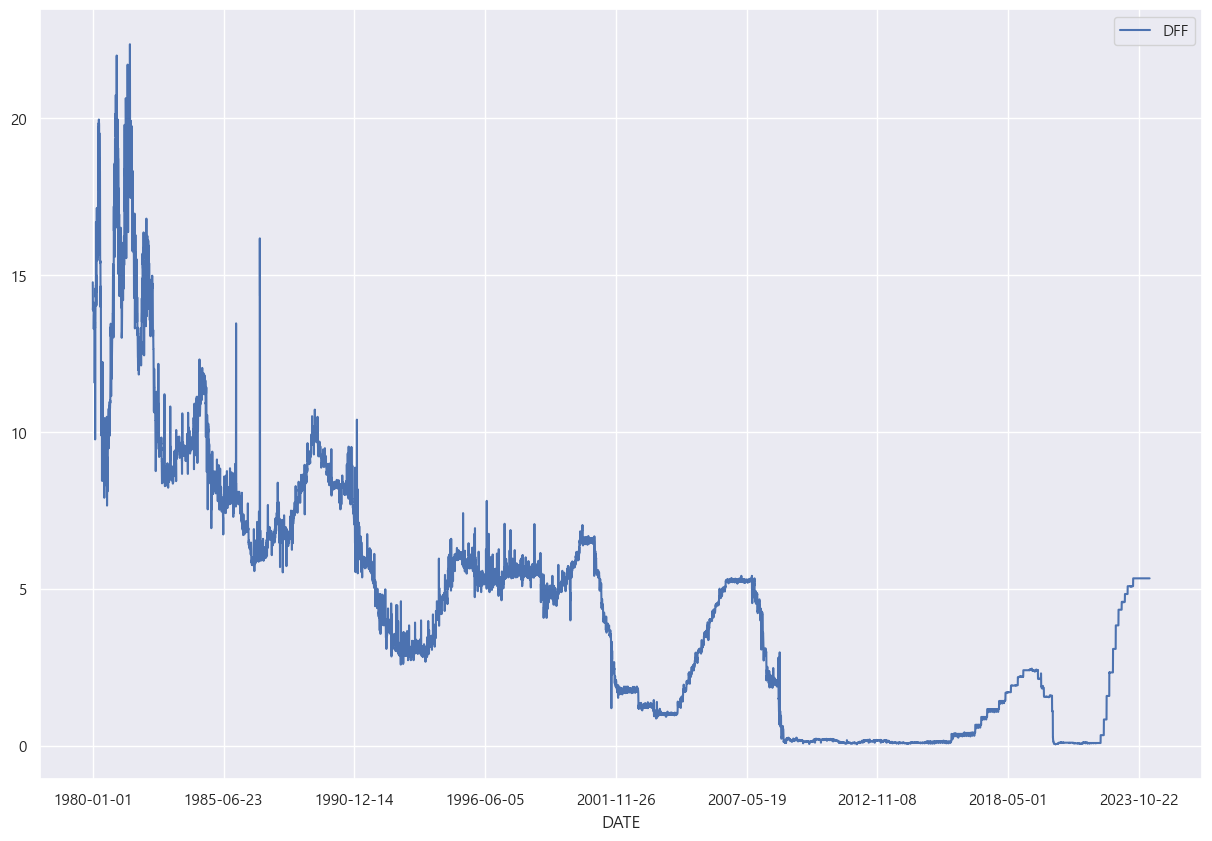

In [6]:
df_40Y_rate.plot(figsize = (15,10))
df_40Y_rate.min()

In [8]:
df_40Y_rate['RateChange'] = df_40Y_rate['DFF'].diff()
df_40Y_rate['Decrease'] = df_40Y_rate['RateChange'] < 0

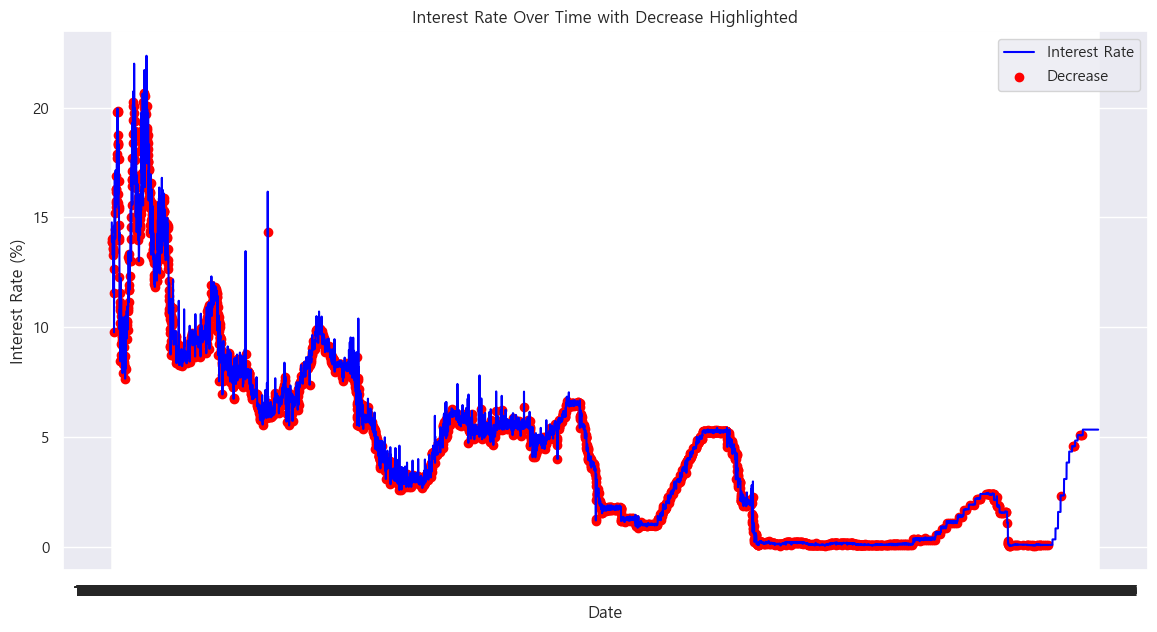

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df_40Y_rate.index, df_40Y_rate['DFF'], label='Interest Rate', color='blue')
plt.scatter(df_40Y_rate[df_40Y_rate['Decrease']].index, df_40Y_rate[df_40Y_rate['Decrease']]['DFF'], color='red', label='Decrease')

plt.title('Interest Rate Over Time with Decrease Highlighted')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df_sp500 = fdr.DataReader('SPY', '1980-01-01', '2023-12-31')

In [11]:
df_40Y_rate.index = pd.to_datetime(df_40Y_rate.index)
df_sp500.index = pd.to_datetime(df_sp500.index)
df_combined = pd.merge(df_40Y_rate, df_sp500, left_index=True, right_index=True, how='inner')
df_combined.rename(columns={'Close': 'SP500_Close'}, inplace=True)
df_combined.head()

,DFF,RateChange,Decrease,Open,High,Low,SP500_Close,Adj Close,Volume
1993-01-29,3.02,0.05,False,43.96875,43.96875,43.75000,43.93750,24.763731,1003200
1993-02-01,3.25,0.23,False,43.96875,44.25000,43.96875,44.25000,24.939861,480500
1993-02-02,3.18,-0.07,True,44.21875,44.37500,44.12500,44.34375,24.992701,201300
1993-02-03,3.56,0.38,False,44.40625,44.84375,44.37500,44.81250,25.256899,529400
1993-02-04,3.08,-0.48,True,44.96875,45.09375,44.46875,45.00000,25.362583,531500


In [12]:
df_combined['RateChange'] = df_combined['DFF'].diff()
df_combined['RateDecrease'] = df_combined['RateChange'] < 0 #금리 하락시점 식별
rate_decrease_days = df_combined[df_combined['RateDecrease']]
rate_decrease_days[['DFF', 'RateChange']] #금리가 하락한 날짜와 금리 변화량을 확인

,DFF,RateChange
1993-02-02,3.18,-0.07
1993-02-04,3.08,-0.48
1993-02-05,2.87,-0.21
1993-02-09,2.90,-0.04
1993-02-10,2.88,-0.02
...,...,...
2023-02-27,4.57,-0.01
2023-03-02,4.57,-0.01
2023-06-15,5.07,-0.01
2023-06-20,5.07,-0.01


In [13]:
rate_decrease_dates = rate_decrease_days.index.tolist()

In [14]:
from datetime import timedelta
def analyze_stock_market_response(df, dates, periods):
    results = {}
    
    for period in periods:
        changes = []
        
        for date in dates:
            start_price = df.loc[date, 'SP500_Close'] if date in df.index else None
            end_date = date + timedelta(days=30*period)
            end_price = df.loc[end_date, 'SP500_Close'] if end_date in df.index else None
            
            if start_price and end_price:
                change = (end_price - start_price) / start_price
                changes.append(change)
                
        results[period] = changes
        
    return results

periods = [1, 3, 6]  # 분석할 기간 
stock_market_changes = analyze_stock_market_response(df_combined, rate_decrease_dates, periods)

for period, changes in stock_market_changes.items():
    avg_change = sum(changes) / len(changes)
    print(f"{period}개월 후 평균 주식 시장 변화율: {avg_change*100:.2f}%")

1개월 후 평균 주식 시장 변화율: 0.63%
3개월 후 평균 주식 시장 변화율: 2.00%
6개월 후 평균 주식 시장 변화율: 4.01%


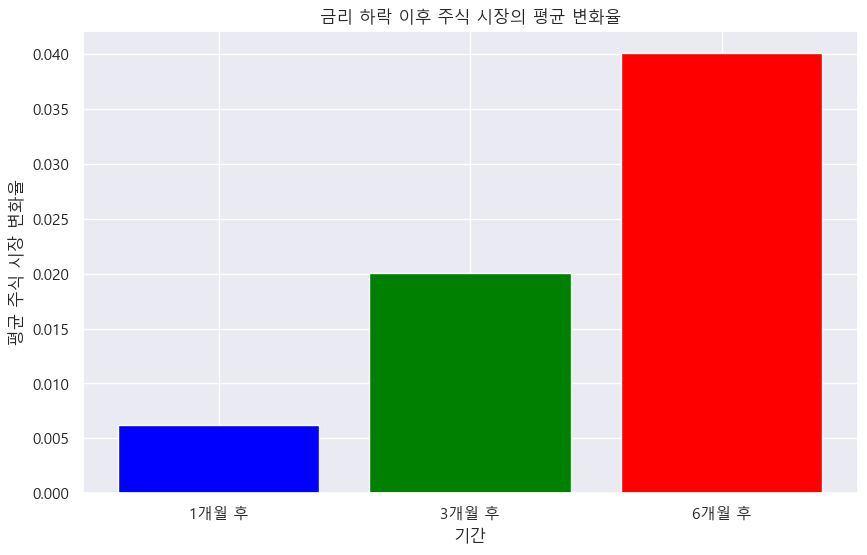

In [15]:
periods = [1, 3, 6]
avg_changes = [sum(changes) / len(changes) for changes in stock_market_changes.values()]


plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(periods))
plt.bar(bar_positions, avg_changes, color=['blue', 'green', 'red'])

plt.xticks(bar_positions, [f'{period}개월 후' for period in periods])
plt.xlabel('기간')
plt.ylabel('평균 주식 시장 변화율')
plt.title('금리 하락 이후 주식 시장의 평균 변화율')
plt.axhline(0, color='gray', linewidth=0.8)  # 변화율 0을 나타내는 선 추가
plt.show()

 진행한 분석에서 나온 결과,금리 하락 이후의 주식 시장 변화율이 양수로 나타남에따라 금리 인하 후 주식 시장이 평균적으로 상승했다는 것을 의미한다.
이러한 분석 결과는 금리 인하가 투자자들에게 긍정적인 신호로 해석될 수 있고 소비와 투자가 증가하여 경제 활동이 활성화되기 때문일 수 있다. 
하지만 2008년 금융 위기와 2020년 코로나19 팬데믹 기간의 금리 인하 후 주식 시장이 큰 폭으로 하락한 사례는 금리 인하가 항상 주식 시장에 긍정적인 영향만을 미치지 않는다는 것을 보여준다.


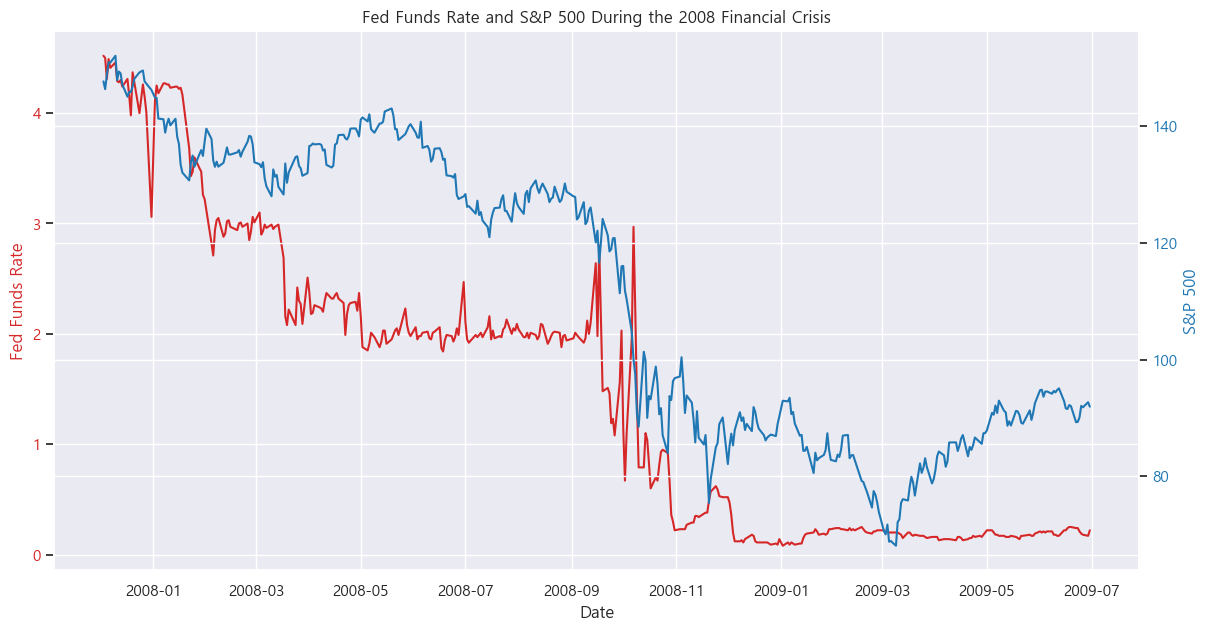

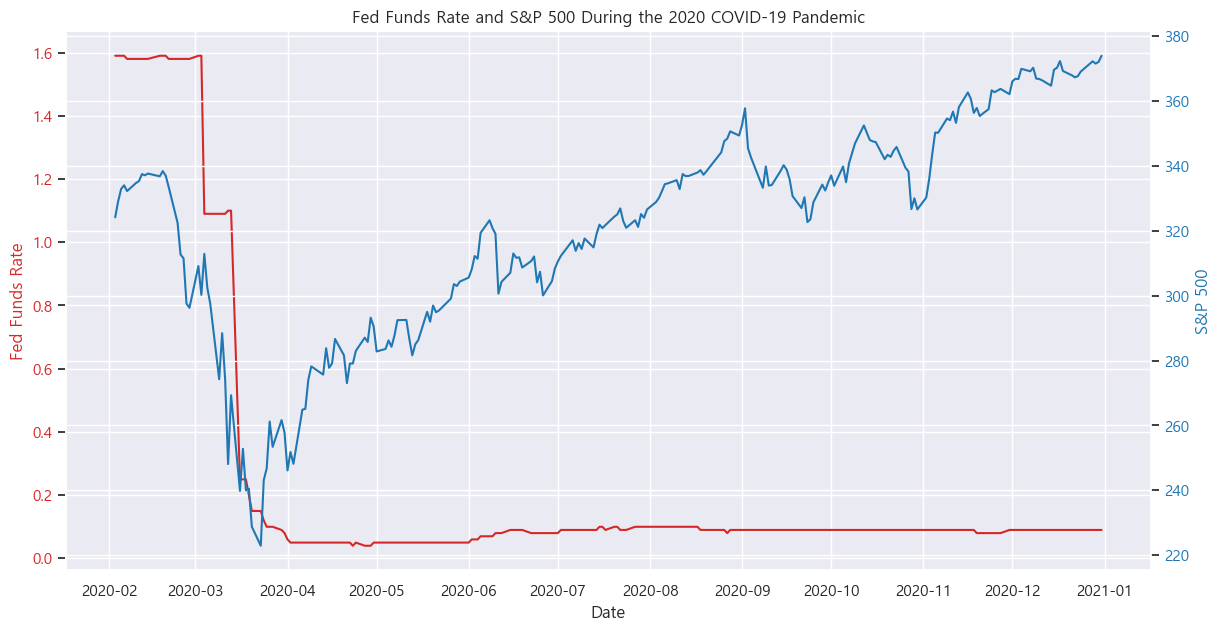

In [16]:
df_decrease_2008 = df_combined.loc['2007-12-01':'2009-06-30']
df_decrease_2020 = df_combined.loc['2020-02-01':'2020-12-31']

def plot_period_response(df, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))
     
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Fed Funds Rate', color=color)
    ax1.plot(df.index, df['DFF'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('S&P 500', color=color)
    ax2.plot(df.index, df['SP500_Close'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(title)
    plt.show()
    
plot_period_response(df_decrease_2008, 'Fed Funds Rate and S&P 500 During the 2008 Financial Crisis')
plot_period_response(df_decrease_2020, 'Fed Funds Rate and S&P 500 During the 2020 COVID-19 Pandemic')

이 기간 동안 금리가 급격히 인하되었음에도 불구하고, 주식 시장은 크게 하락한 것을 볼 수 있다. 
이는 금리 인하만으로는 근본적인 금융 위기와 경제적 불확실성을 해결할 수 없었음을 의미한다고 볼 수 있다.
